In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

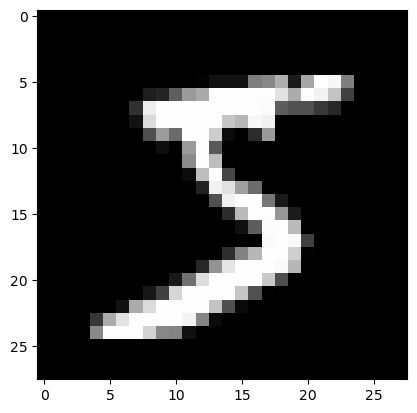

In [12]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
plt.imshow(train_x[0], cmap='gray')
train_x = train_x.reshape(-1, 28, 28, 1) / 255.0
test_x = test_x.reshape(-1, 28, 28, 1) / 255.0
train_y, test_y = to_categorical(train_y), to_categorical(test_y)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=13)


In [7]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(28,28,1)),
    LeakyReLU(0.1),
    MaxPooling2D((2,2), padding='same'),
    Flatten(),
    Dense(10, activation='softmax')
])


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=3, batch_size=64, verbose=1)


Epoch 1/3
750/750 [==============================] - 15s 17ms/step - loss: 0.2933 - accuracy: 0.9181 - val_loss: 0.1333 - val_accuracy: 0.9627
Epoch 2/3
750/750 [==============================] - 13s 17ms/step - loss: 0.1015 - accuracy: 0.9713 - val_loss: 0.0873 - val_accuracy: 0.9746
Epoch 3/3
750/750 [==============================] - 12s 17ms/step - loss: 0.0729 - accuracy: 0.9791 - val_loss: 0.0825 - val_accuracy: 0.9748


In [9]:
loss, acc = model.evaluate(test_x, test_y, verbose=0)
print(f"\nTest Accuracy: {acc:.4f} | Test Loss: {loss:.4f}")


Test Accuracy: 0.9785 | Test Loss: 0.0686


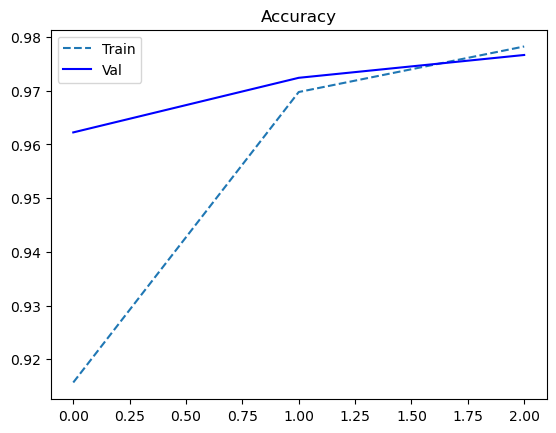

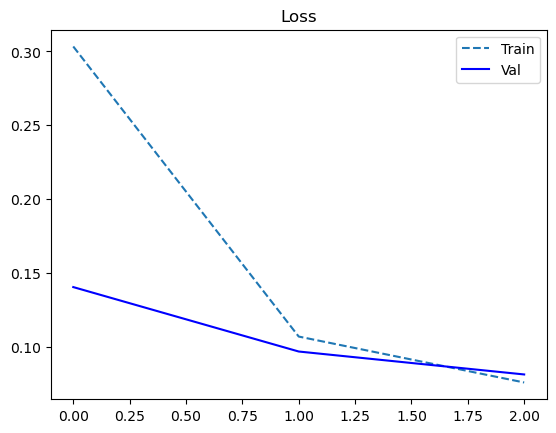

In [13]:
plt.plot(history.history['accuracy'], '--', label='Train')
plt.plot(history.history['val_accuracy'], 'b', label='Val')
plt.title('Accuracy'); plt.legend()
plt.show()

plt.plot(history.history['loss'], '--', label='Train')
plt.plot(history.history['val_loss'], 'b', label='Val')
plt.title('Loss'); plt.legend()
plt.show()